In [5]:
import math
import scipy.special
import pandas as pd
import numpy as np
from collections import deque
from itertools import combinations

def binary_permutations(lst: []) -> [[]]:
    result = []
    for comb in combinations(range(len(lst)), lst.count(1)):
        permutation = [0] * len(lst)
        for i in comb:
            permutation[i] = 1
        result.append(permutation)
    return result

def calculate_z(parity_vector: []) -> int:
    indices = []
    for i, entry in enumerate(parity_vector, start=0):
        if entry == 1:
            indices.append(i)
    
    result = 0
    U = len(indices)
    for i, entry in enumerate(indices, start=0):
        result = result + 3**(U-(i+1)) * 2**(entry)
    return result

def generate_df(n: int, U: int) -> pd.DataFrame:
    if n == 0 or U == 0 or n < U:
        return None

    df = pd.DataFrame(columns = ['parity_vector', 'shifted orbits', 'z vals', 'min_z'])
    p_v = [0] * n
    for i in range(U):
        p_v[i] = 1
    permutations = binary_permutations(p_v)
    for i in range(len(permutations)):
        vec = permutations[i]
        z_vals = []
        shifted_vecs = []
        shifted = vec.copy()

        for j in range(len(shifted)):
            shifted_vecs.append(''.join(map(str, shifted)))
            z_vals.append(calculate_z(shifted))
            temp = deque(shifted)
            temp.rotate(-1)
            shifted = list(temp)
        min_z_vals = min(z_vals) if len(z_vals) > 0 else 0
        df.loc[i] = [''.join(map(str, vec)), shifted_vecs, z_vals, min_z_vals]
    return df

def calculate_N(M:int, n:int, U:int) -> int:
    r = math.gcd(n, U)
    sum = 0
    for i in range(r):
        sum += 2**(i*n/r)*3**(U-1-i*U/r)
    return 2*M - int(sum)


print(len(binary_permutations([1,1,1,1,1,0,0,0,0,0,0])))
print(scipy.special.binom(5, 3))

#n=17
#U=7
n=14
U=8
df = generate_df(n, U)
M = df['min_z'].max()
N = calculate_N(M, n, U)
c = 2**n-3**U
print("M({0},{1})={2}".format(n, U, M))
print("N({0},{1})={2}".format(n, U, N))
print("c={0}".format(c))

df.head(100)


462
10.0
M(11,9)=21251
N(11,9)=35941
c=-17635


,parity_vector,shifted orbits,z vals,min_z
0,11111111100,"[11111111100, 11111111001, 11111110011, 111111...","[19171, 19939, 21091, 22819, 25411, 29299, 351...",19171
1,11111111010,"[11111111010, 11111110101, 11111101011, 111110...","[19427, 20323, 21667, 23683, 26707, 31243, 380...",19427
2,11111111001,"[11111111001, 11111110011, 11111100111, 111110...","[19939, 21091, 22819, 25411, 29299, 35131, 438...",19171
3,11111110110,"[11111110110, 11111101101, 11111011011, 111101...","[19811, 20899, 22531, 24979, 28651, 34159, 424...",19811
4,11111110101,"[11111110101, 11111101011, 11111010111, 111101...","[20323, 21667, 23683, 26707, 31243, 38047, 482...",19427
5,11111110011,"[11111110011, 11111100111, 11111001111, 111100...","[21091, 22819, 25411, 29299, 35131, 43879, 570...",19171
6,11111101110,"[11111101110, 11111011101, 11110111011, 111011...","[20387, 21763, 23827, 26923, 31567, 38533, 489...",20387
7,11111101101,"[11111101101, 11111011011, 11110110111, 111011...","[20899, 22531, 24979, 28651, 34159, 42421, 548...",19811
8,11111101011,"[11111101011, 11111010111, 11110101111, 111010...","[21667, 23683, 26707, 31243, 38047, 48253, 635...",19427
9,11111100111,"[11111100111, 11111001111, 11110011111, 111001...","[22819, 25411, 29299, 35131, 43879, 57001, 766...",19171


In [6]:
max_n=10
data = np.empty((0, 4), int)
for x in range(max_n):
    data_n = np.empty((0, 4), int)
    for y in range(max_n):
        df = generate_df(x, y)
        M = 0 if df is None else df['min_z'].max()
        N = 0 if M == 0 else calculate_N(M, x, y)
        data_n = np.append(data_n, np.array([[x, y, M, N]]), axis=0)
    data=np.append(data, data_n, axis=0)

columns = ['x', 'y', 'M', 'N']
df = pd.DataFrame(data, columns=columns)
df.to_csv('c:/temp/collatz_M_N.csv', index=False)

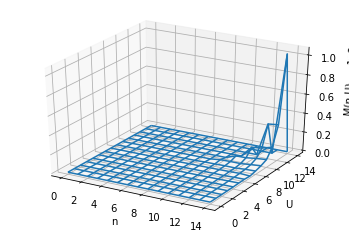

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

max_n = 15
x = np.linspace(0, max_n-1, max_n)
y = np.linspace(0, max_n-1, max_n)
X, Y = np.meshgrid(x, y)
X = X.astype(int)
Y = Y.astype(int)
Z = np.zeros(shape=(max_n, max_n))

def fn_plot_M(x, y):
    df = generate_df(x, y)
    M = 0 if df is None else df['min_z'].max()
    N = 0 if M == 0 else calculate_N(M, x, y)
    return N-M

fn_vectorized_M = np.vectorize(fn_plot_M)
Z_M = fn_vectorized_M(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z_M)
ax.set_xlabel('n')
ax.set_ylabel('U')
ax.set_zlabel('M(n,U)')
plt.show()